# **Random Search**


Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively. The drawback of random search is that it yields high variance during computing. Since the selection of parameters is completely random; and since no intelligence is used to sample these combinations, luck plays its part.

Below is a visual description of search pattern of the random search:

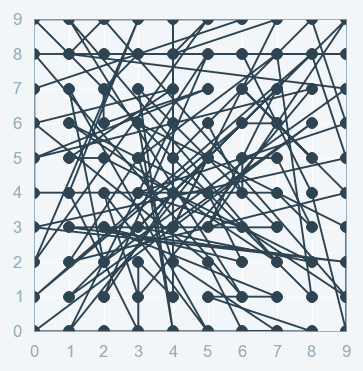

As random values are selected at each instance, it is highly likely that the whole of action space has been reached because of the randomness, which takes a huge amount of time to cover every aspect of the combination during grid search. This works best under the assumption that not all hyperparameters are equally important. In this search pattern, random combinations of parameters are considered in every iteration. The chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimised parameters without any aliasing. 

## **Implementation of Regression Model**

First, we will import all the required libraries and the dataset and do the basic EDA to understand the data. Use the below code to do the same

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [4]:
import pandas as pd

import numpy as np

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df= pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print(df.shape)

(506, 14)


In [7]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


There are a total of 506 rows and 14 columns in the data set, all the columns have float64 data type values and there are no missing values in the data set. Now we will define the independent and dependent variables y and x respectively. We will then split the dataset into training and testing. After which the training data will be passed to the decision tree regression model & score on testing would be computed. Refer to the below code for the same. 

In [9]:
y = df['target']

X = df.drop('target', axis=1)

In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
print(dtr.score(X_test,y_test))

0.8344490562120316


## **Implementation of Model using GridSearchCV**

First, we will define the library required for grid search followed by defining all the parameters or the combination that we want to test out on the model. We have taken only the four hyperparameters whereas you can define as much as you want. If you increase the number of combinations then time complexity will increase. Use the below code to do the same.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

Now we will define the type of model we want to build a random forest regression model in this case and initialize the GridSearchCV over this model for the above-defined parameters. 

In [14]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

We have defined the estimator to be the random forest regression model param_grid to all the parameters we wanted to check and cross-validation to 3. We will now train this model bypassing the training data and checking for the score on testing data. Use the below code to do the same.

In [15]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}


We can check the best parameter by using the best_params_ function that is shown above. 

In [16]:

rfr_grid = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='auto', n_estimators=13)
rfr_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=13, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
print(rfr_grid.score(X_test, y_test))

0.8705478601628849


## **Implementation of Model using RandomizedSearchCV**

First, we will define the library required for random search followed by defining all the parameters or the combination that we want to test out on the model. Similar to grid search we have taken only the four hyperparameters whereas you can define as much as you want. We have then defined the random grid. Use the below code to do the same.

In [18]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


We will now define the random search passing the rf model with the randomly chosen hyperparameters and then train it. After this, we will check the score. Use the below code to do the same.

In [19]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished


In [21]:
print(rfr_random.best_params_)

{'n_estimators': 12, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [22]:
rfr_random = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='auto', n_estimators=12)
rfr_random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=12, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
print(rfr_random.score(X_test , y_test))

0.9161110378541897


## **Comparison of Models**

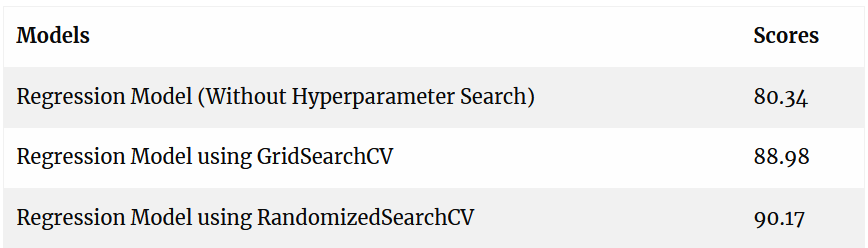

# **Related Articles --**

> * [Grid Search V/S Random Search](https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/) 
> * [Why Random Search is Better ? ](https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/)
> * [Food Cost Prediction with Grid Search](https://analyticsindiamag.com/parameter-tuning-with-grid-search-a-hands-on-introduction-with-food-cost-prediction-data-science-hackathon/)